#AltSchool of Data Science Tinyuka 2024 Second Semester Project Exam

###Project Title:

“Which Headline Works Better? A/B Testing with Real API Data”

###Project Brief:

As a data analyst for a media platform, I'm experimenting with different article headlines and post timings. This code is to simulate an A/B test using real-world data pulled from a news API and analyze engagement trends.

## 📎 Project Files

#- [📝 Read Full Project Report (Word Document)](https://docs.google.com/document/d/1P6Y1Eb5H7IZ8BMpfMzNTNo2Fwg2it_U58XXF8qWTdzs/edit?usp=sharing)

- [🔗 Download Raw Dataset (CSV)](https://docs.google.com/spreadsheets/d/11qUgwToiY_iCVLAxGHOLbgtmMwXf4BTJIo_NydTJ4o4/edit?usp=sharing)
-[🔗 Download Clean Dataset (CSV)](https://docs.google.com/spreadsheets/d/1agq3lPXdrZU7Tadj_EMrXlEJnyD9vknZbpj3nGWAImI/edit?usp=sharing)

In [149]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

##1. API Integration and Data Retrieval

I will be using the public API (News API) to pull the article or post data (e.g., news headlines, timestamps, source, and categories).

In [150]:
#Got this key from NewsAPI after signing up

api_key = '6c569707406e4f23a0f90174b0804477'

In [151]:
#My API endpoint

url = 'https://newsapi.org/v2/everything'

params = {
    'q': 'health',                 # Topic: health
    'from': '2025-05-20',         # Start date
    'language': 'en',             # Language of articles
    'sortBy': 'publishedAt',      # Sort articles by newest first
    'pageSize': 100,              # Number of articles per request (max 100)
    'apiKey': api_key
}

In [152]:
#API REQUEST
response = requests.get(url, params=params)

In [153]:
#Convert the response to JSON format
data = response.json()

In [154]:
# Checking if data was returned successfully
if data.get("status") == "ok":
    print(f" Fetched {len(data['articles'])} articles.")
else:
    print("Failed to fetch data. Check your API key or parameters.")

 Fetched 94 articles.


In [155]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
#  Save the file *into Google Drive*
file_path = '/content/drive/My Drive/Altschool/health_raw_articles.csv'

articles.to_csv(file_path, index=False)


In [157]:
# Loading saved data
df = pd.read_csv(file_path)
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'HuffPost'}",Elizabeth Yuko,Half Of US States Are Facing A Caregiver Crisi...,With 48% of states already on the brink of a c...,https://www.huffpost.com/entry/caregjver-crisi...,https://img.buzzfeed.com/buzzfeed-static/stati...,2025-06-14T10:16:02Z,On top of all the emotional and logistical cha...
1,"{'id': None, 'name': 'CNET'}",Katherine Watt,Trying to Find a Job? In This Economy? You Nee...,I asked career specialists for their top tips ...,https://www.cnet.com/personal-finance/banking/...,https://www.cnet.com/a/img/resize/b242cf138b01...,2025-06-14T10:15:03Z,The job hunt isn't what it used to be. Experts...
2,"{'id': 'the-irish-times', 'name': 'The Irish T...",Kitty Holland,Tusla thinks missing 12-year-old is safe and i...,Agency acknowledges formal strategy meeting wa...,https://www.irishtimes.com/ireland/social-affa...,https://www.irishtimes.com/resizer/v2/OQ3QTNFS...,2025-06-14T10:12:30Z,A 12-year-old child who went missing from Stat...
3,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,Sun Pharma gets eight observations from USFDA ...,Sun Pharma announced that the USFDA issued a F...,https://economictimes.indiatimes.com/industry/...,"https://img.etimg.com/thumb/msid-121847220,wid...",2025-06-14T10:11:46Z,Drug major Sun Pharma on Saturday said the US ...
4,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,ITC completes acquisition of 24 Mantra Organic...,ITC has finalized its all-cash acquisition of ...,https://economictimes.indiatimes.com/industry/...,"https://img.etimg.com/thumb/msid-121847238,wid...",2025-06-14T10:11:41Z,Multi-conglomerate ITC has completed the acqui...


In [161]:
#Looking at raw data|
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       94 non-null     object
 1   author       86 non-null     object
 2   title        94 non-null     object
 3   description  94 non-null     object
 4   url          94 non-null     object
 5   urlToImage   84 non-null     object
 6   publishedAt  94 non-null     object
 7   content      94 non-null     object
dtypes: object(8)
memory usage: 6.0+ KB


#2.Simulate an A/B Test Group


In [162]:
# Create a new column for headline length (in characters)
df['headline_length'] = df['title'].apply(lambda x: len(str(x)))

In [163]:
#using the median headline length to split the groups (so they're balanced)
median_length = df['headline_length'].median()
print(f"Median Headline Length: {median_length}")

Median Headline Length: 80.5


In [164]:
#Assign A/B Groups Based on Headline Lenght
#Group A: headline shorter than or equal to median

#Group B: headline longer than median

df['group'] = df['headline_length'].apply(
    lambda x: 'A' if x <= median_length else 'B'
)

In [165]:
# Check how many articles are in each group
print(df['group'].value_counts())

group
B    47
A    47
Name: count, dtype: int64


In [166]:
# Preview the updated DataFrame
df[['title', 'headline_length', 'group']].head()

,title,headline_length,group
0,Half Of US States Are Facing A Caregiver Crisi...,112,B
1,Trying to Find a Job? In This Economy? You Nee...,69,A
2,Tusla thinks missing 12-year-old is safe and i...,50,A
3,Sun Pharma gets eight observations from USFDA ...,61,A
4,ITC completes acquisition of 24 Mantra Organic...,73,A


#3.Data Cleaning & Exploration

In [167]:
# Basic structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source           94 non-null     object
 1   author           86 non-null     object
 2   title            94 non-null     object
 3   description      94 non-null     object
 4   url              94 non-null     object
 5   urlToImage       84 non-null     object
 6   publishedAt      94 non-null     object
 7   content          94 non-null     object
 8   headline_length  94 non-null     int64 
 9   group            94 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.5+ KB


In [168]:
#Data shape
df.shape

(94, 10)

In [169]:
# First few rows
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,headline_length,group
0,"{'id': None, 'name': 'HuffPost'}",Elizabeth Yuko,Half Of US States Are Facing A Caregiver Crisi...,With 48% of states already on the brink of a c...,https://www.huffpost.com/entry/caregjver-crisi...,https://img.buzzfeed.com/buzzfeed-static/stati...,2025-06-14T10:16:02Z,On top of all the emotional and logistical cha...,112,B
1,"{'id': None, 'name': 'CNET'}",Katherine Watt,Trying to Find a Job? In This Economy? You Nee...,I asked career specialists for their top tips ...,https://www.cnet.com/personal-finance/banking/...,https://www.cnet.com/a/img/resize/b242cf138b01...,2025-06-14T10:15:03Z,The job hunt isn't what it used to be. Experts...,69,A
2,"{'id': 'the-irish-times', 'name': 'The Irish T...",Kitty Holland,Tusla thinks missing 12-year-old is safe and i...,Agency acknowledges formal strategy meeting wa...,https://www.irishtimes.com/ireland/social-affa...,https://www.irishtimes.com/resizer/v2/OQ3QTNFS...,2025-06-14T10:12:30Z,A 12-year-old child who went missing from Stat...,50,A
3,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,Sun Pharma gets eight observations from USFDA ...,Sun Pharma announced that the USFDA issued a F...,https://economictimes.indiatimes.com/industry/...,"https://img.etimg.com/thumb/msid-121847220,wid...",2025-06-14T10:11:46Z,Drug major Sun Pharma on Saturday said the US ...,61,A
4,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,ITC completes acquisition of 24 Mantra Organic...,ITC has finalized its all-cash acquisition of ...,https://economictimes.indiatimes.com/industry/...,"https://img.etimg.com/thumb/msid-121847238,wid...",2025-06-14T10:11:41Z,Multi-conglomerate ITC has completed the acqui...,73,A


In [170]:
#Column names
df.columns

Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content', 'headline_length', 'group'],
      dtype='object')

In [171]:
# Check data types
print(df.dtypes)

source             object
author             object
title              object
description        object
url                object
urlToImage         object
publishedAt        object
content            object
headline_length     int64
group              object
dtype: object


In [172]:
# Converting 'publishedAt' column to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [173]:
# Checking again to confirm
df.dtypes

,0
source,object
author,object
title,object
description,object
url,object
urlToImage,object
publishedAt,"datetime64[ns, UTC]"
content,object
headline_length,int64
group,object


In [174]:
#Show first 5 rows of Group A (long headlines)
df.loc[df['group'] == 'A'].head()

,source,author,title,description,url,urlToImage,publishedAt,content,headline_length,group
1,"{'id': None, 'name': 'CNET'}",Katherine Watt,Trying to Find a Job? In This Economy? You Nee...,I asked career specialists for their top tips ...,https://www.cnet.com/personal-finance/banking/...,https://www.cnet.com/a/img/resize/b242cf138b01...,2025-06-14 10:15:03+00:00,The job hunt isn't what it used to be. Experts...,69,A
2,"{'id': 'the-irish-times', 'name': 'The Irish T...",Kitty Holland,Tusla thinks missing 12-year-old is safe and i...,Agency acknowledges formal strategy meeting wa...,https://www.irishtimes.com/ireland/social-affa...,https://www.irishtimes.com/resizer/v2/OQ3QTNFS...,2025-06-14 10:12:30+00:00,A 12-year-old child who went missing from Stat...,50,A
3,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,Sun Pharma gets eight observations from USFDA ...,Sun Pharma announced that the USFDA issued a F...,https://economictimes.indiatimes.com/industry/...,"https://img.etimg.com/thumb/msid-121847220,wid...",2025-06-14 10:11:46+00:00,Drug major Sun Pharma on Saturday said the US ...,61,A
4,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,ITC completes acquisition of 24 Mantra Organic...,ITC has finalized its all-cash acquisition of ...,https://economictimes.indiatimes.com/industry/...,"https://img.etimg.com/thumb/msid-121847238,wid...",2025-06-14 10:11:41+00:00,Multi-conglomerate ITC has completed the acqui...,73,A
11,"{'id': None, 'name': 'YouTube'}",NaN,They Censored Our Show For Daring To Talk Abou...,They Censored Our Show For Daring To Talk Abou...,https://www.youtube.com/supported_browsers?nex...,NaN,2025-06-14 10:01:12+00:00,Your browser isnt supported anymore. Update it...,60,A


In [175]:
# Show articles with headline length greater than 100
df.loc[df['headline_length'] > 100]

,source,author,title,description,url,urlToImage,publishedAt,content,headline_length,group
0,"{'id': None, 'name': 'HuffPost'}",Elizabeth Yuko,Half Of US States Are Facing A Caregiver Crisi...,With 48% of states already on the brink of a c...,https://www.huffpost.com/entry/caregjver-crisi...,https://img.buzzfeed.com/buzzfeed-static/stati...,2025-06-14 10:16:02+00:00,On top of all the emotional and logistical cha...,112,B
5,"{'id': 'the-times-of-india', 'name': 'The Time...",Nishtha Awasthi,F&O Talk| Nifty's narrow range breaks on Iran-...,"Amidst escalating geopolitical tensions, India...",https://economictimes.indiatimes.com/markets/e...,"https://img.etimg.com/thumb/msid-121847182,wid...",2025-06-14 10:10:25+00:00,Markets remained under pressure and ended the ...,112,B
7,"{'id': None, 'name': 'LADbible'}",Britt Jones,What we know about British mum whose ‘heart we...,Beth Martin passed away on 29 April during wha...,https://www.ladbible.com/news/uk-news/british-...,https://images.ladbible.com/ogimage/v3/assets/...,2025-06-14 10:07:56+00:00,A British mums heart went missing after her my...,105,B
24,"{'id': 'cnn', 'name': 'CNN'}","Esteban Campanela, PabloAntonio GarciaEscorihuela",FIFA Club World Cup: What to know as the most ...,When the ball gets kicked off the center circl...,https://www.cnn.com/2025/06/14/sport/club-worl...,https://media.cnn.com/api/v1/images/stellar/pr...,2025-06-14 09:55:42+00:00,When the ball gets kicked off the center circl...,103,B
27,"{'id': None, 'name': 'Lenscratch.com'}",Megan Bent,The Dynamics of Photography and Disability: Pa...,"In this ongoing series, Megan Bent interviews ...",http://lenscratch.com/2025/06/the-dynamics-of-...,http://lenscratch.com/wp-content/uploads/2025/...,2025-06-14 09:40:35+00:00,"© Pauly V., Vials (1), film photography and cy...",127,B
31,"{'id': 'business-insider', 'name': 'Business I...",Alice Tecotzky,I own a small solar company in Montana and mig...,"Ralph Walters, owner of SBS solar in Montana, ...",https://www.businessinsider.com/small-business...,https://i.insider.com/684aec693d5881a51c1b48dc...,2025-06-14 09:28:01+00:00,Ralph Walters owns SBS Solar in Montana with h...,117,B
38,"{'id': None, 'name': 'Globalsecurity.org'}",John Pike,Respected Comrade Kim Jong Un Makes Speech at ...,The respected Comrade Kim Jong Un made a speec...,https://www.globalsecurity.org/wmd/library/new...,NaN,2025-06-14 09:11:27+00:00,Korean Central News Agency of DPRK\r\nPyongyan...,109,B
39,"{'id': None, 'name': 'Globalsecurity.org'}",John Pike,Secretary General Alain Berset voices strong s...,On his first visit to Armenia as Secretary Gen...,https://www.globalsecurity.org/military/librar...,NaN,2025-06-14 09:11:27+00:00,Council of Europe\r\nSecretary GeneralYerevan ...,113,B
41,"{'id': None, 'name': 'Globalsecurity.org'}",John Pike,Food insecurity in Lebanon returns to near pre...,Under the patronage and in the presence of Leb...,https://www.globalsecurity.org/military/librar...,NaN,2025-06-14 09:11:27+00:00,World Food Programme\r\n13 June 2025\r\n21 per...,107,B
51,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Orrin Onken),My wife and I were both managers. When we reti...,Orrin Onken and his wife were both long-term m...,https://www.businessinsider.com/retirement-man...,https://i.insider.com/684c0154f748d8c055f3a2ad...,2025-06-14 09:02:01+00:00,I was a lawyer running my own practice. My wif...,113,B


In [176]:
# Show first 5 rows, first 3 columns
df.iloc[0:5, 0:3]

,source,author,title
0,"{'id': None, 'name': 'HuffPost'}",Elizabeth Yuko,Half Of US States Are Facing A Caregiver Crisi...
1,"{'id': None, 'name': 'CNET'}",Katherine Watt,Trying to Find a Job? In This Economy? You Nee...
2,"{'id': 'the-irish-times', 'name': 'The Irish T...",Kitty Holland,Tusla thinks missing 12-year-old is safe and i...
3,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,Sun Pharma gets eight observations from USFDA ...
4,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,ITC completes acquisition of 24 Mantra Organic...


In [177]:
#Checking for missing values
df.isnull().sum()

,0
source,0
author,8
title,0
description,0
url,0
urlToImage,10
publishedAt,0
content,0
headline_length,0
group,0


In [178]:
#Filling missing data
df.fillna({'author': 'unknown'}, inplace=True)
df.isnull().sum()

,0
source,0
author,0
title,0
description,0
url,0
urlToImage,10
publishedAt,0
content,0
headline_length,0
group,0


In [179]:
# Drop irrelevant columns
df_clean = df.drop(['source', 'author', 'url', 'urlToImage', 'publishedAt'], axis=1)

In [180]:
# Save cleaned data to Google Drive
clean_file_path = '/content/drive/My Drive/Altschool/health_cleaned_articles.csv'
df_clean.to_csv(clean_file_path, index=False)

In [181]:
# Reloading to confirm everything is fine
df_clean = pd.read_csv(clean_file_path)
df_clean.head()

,title,description,content,headline_length,group
0,Half Of US States Are Facing A Caregiver Crisi...,With 48% of states already on the brink of a c...,On top of all the emotional and logistical cha...,112,B
1,Trying to Find a Job? In This Economy? You Nee...,I asked career specialists for their top tips ...,The job hunt isn't what it used to be. Experts...,69,A
2,Tusla thinks missing 12-year-old is safe and i...,Agency acknowledges formal strategy meeting wa...,A 12-year-old child who went missing from Stat...,50,A
3,Sun Pharma gets eight observations from USFDA ...,Sun Pharma announced that the USFDA issued a F...,Drug major Sun Pharma on Saturday said the US ...,61,A
4,ITC completes acquisition of 24 Mantra Organic...,ITC has finalized its all-cash acquisition of ...,Multi-conglomerate ITC has completed the acqui...,73,A


#4.Analysis & Visualization

In [182]:
 #simulating engagement using article word count as the proxy

df_clean['article_length'] = df_clean['content'].apply(lambda x: len(str(x).split()))

In [183]:
#how article length differs between headline groups.
grouped_stats = df_clean.groupby('group')['article_length'].agg(['mean', 'median', 'std', 'max', 'min'])
print(grouped_stats)

            mean  median       std  max  min
group                                       
A      34.148936    35.0  3.593344   41   22
B      33.829787    34.0  4.588829   43   19


In [184]:
#Deeper analysis

np.mean(df_clean['article_length']), np.std(df_clean['article_length'])

(np.float64(33.98936170212766), 4.0802969250816945)

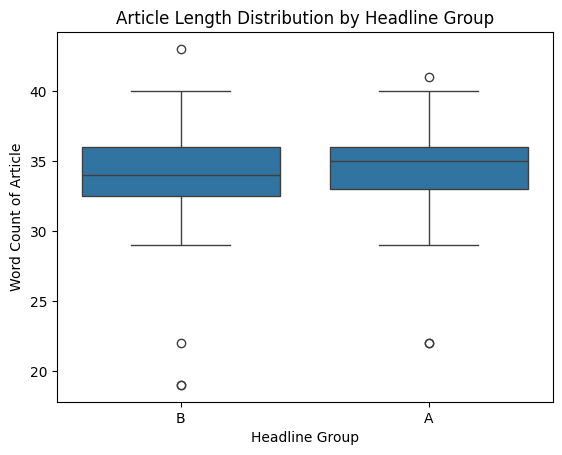

In [185]:
# Boxplot to compare article lengths between Group A and B
sns.boxplot(data=df_clean, x='group', y='article_length')
plt.title('Article Length Distribution by Headline Group')
plt.ylabel('Word Count of Article')
plt.xlabel('Headline Group')
plt.show()

In [186]:
Q1 = df_clean['article_length'].quantile(0.25)
Q3 = df_clean['article_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [187]:
# Filter out outliers
df_clean = df_clean[(df_clean['article_length'] >= lower_bound) & (df_clean['article_length'] <= upper_bound)]

In [188]:
# Grouped stats after outlier removal
grouped_stats_clean = df_clean.groupby('group')['article_length'].agg(['mean', 'median', 'std', 'max', 'min'])
print(grouped_stats_clean)

            mean  median       std  max  min
group                                       
A      34.545455    35.0  2.386537   40   29
B      34.581395    34.0  2.584133   40   29


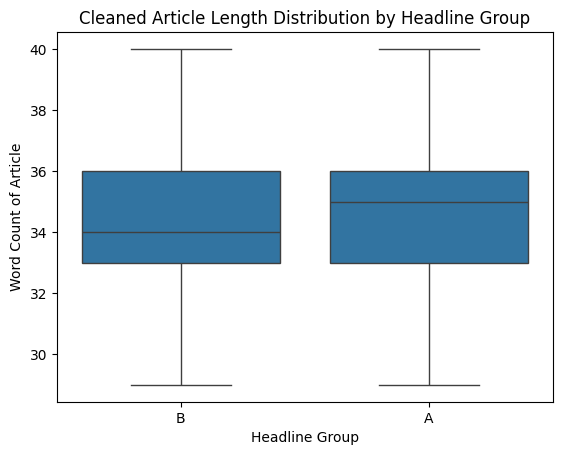

In [189]:
# Boxplot after removing outliers
sns.boxplot(data=df_clean, x='group', y='article_length')
plt.title('Cleaned Article Length Distribution by Headline Group')
plt.ylabel('Word Count of Article')
plt.xlabel('Headline Group')
plt.show()

#5. A/B Test and Interpretation

In [190]:
#Preparing data
group_a = df_clean[df_clean['group'] == 'A']['article_length']
group_b = df_clean[df_clean['group'] == 'B']['article_length']

In [191]:
#A/B Test using ttest_ind
t_stat, p_val = ttest_ind(group_a, group_b, equal_var=False)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

t-statistic: -0.06735392233147827
p-value: 0.9464597928209975


**Interpretation:**
Based on the p-value of 0.946, I fail to reject the null hypothesis. This suggests that, in this dataset, there is no meaningful difference in article length between short-headline and long-headline articles. In other words, headline length does not appear to impact the length (and potentially the depth) of the article.


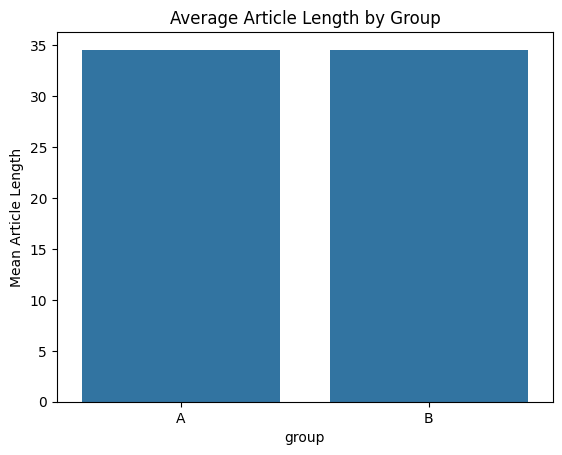

In [192]:
#Visualise the difference in article lengths mean between groups A and B.

group_means = df_clean.groupby('group')['article_length'].mean().reset_index()

sns.barplot(x='group', y='article_length', data=group_means)
plt.title("Average Article Length by Group")
plt.ylabel("Mean Article Length")
plt.show()

#6. Bonus Analysis using Sentiment

In [193]:
# Importing Required Libraries
!pip install textblob
from textblob import TextBlob

In [194]:
# Applying TextBlob to each title
df_clean['polarity'] = df_clean['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_clean['subjectivity'] = df_clean['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Polarity: Ranges from -1 (negative) to +1 (positive)
#Subjectivity: Ranges from 0 (objective) to 1 (subjective)

In [195]:
#converting polarity into sentiment labels:
def get_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df_clean['sentiment'] = df_clean['polarity'].apply(get_sentiment)

<ipython-input-196-1312999928>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='sentiment', palette='Set2')


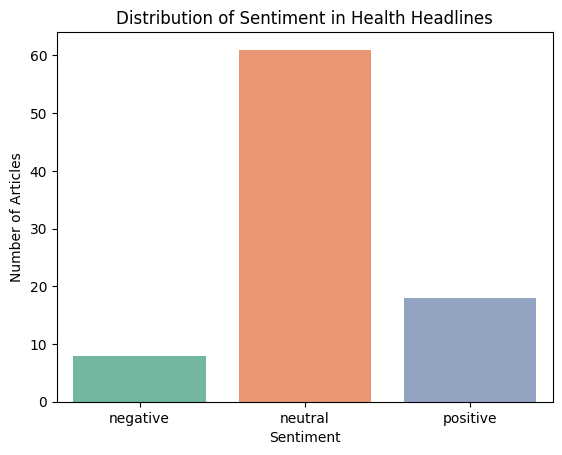

In [196]:
#Visualising sentiment distribution

sns.countplot(data=df_clean, x='sentiment', palette='Set2')
plt.title('Distribution of Sentiment in Health Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

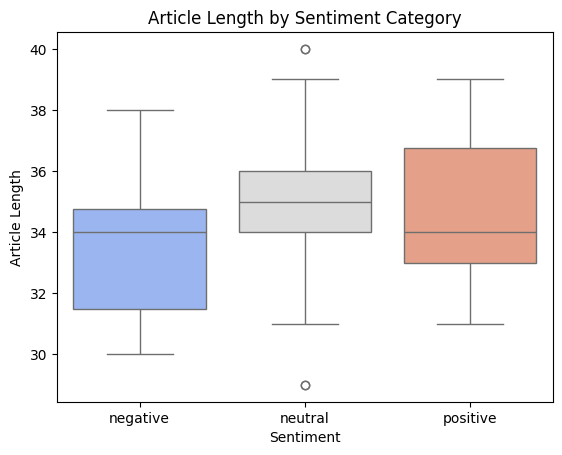

In [197]:
#checking if sentiment relates to how in-depth an article is (via article_length):
sns.boxplot(data=df_clean, x='sentiment', y='article_length', hue='sentiment', palette='coolwarm', legend=False)
plt.title('Article Length by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Article Length')
plt.show()

In [198]:
#averages

df_clean.groupby('sentiment')['article_length'].mean()

,article_length
sentiment,
negative,33.625000
neutral,34.754098
positive,34.333333


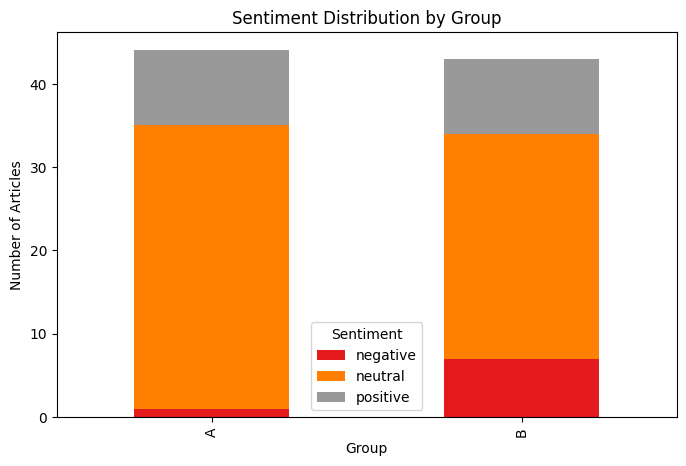

In [199]:
#compare how each test group (A/B) leans emotionally:

group_sentiment = df_clean.groupby(['group', 'sentiment']).size().unstack()
group_sentiment.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set1')
plt.title('Sentiment Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.show()

In [200]:
#Separate article lengths based on sentiment

positive = df_clean[df_clean['sentiment'] == 'positive']['article_length']
negative = df_clean[df_clean['sentiment'] == 'negative']['article_length']


In [201]:
# Run independent t-test
t_stat, p_value = ttest_ind(positive, negative)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 0.6229189128835105
p-value: 0.5392124949178546


In [202]:
# how each test group (A/B) leans emotionally:
pos_group = df_clean[df_clean['sentiment'] == 'positive']['headline_length']
neg_group = df_clean[df_clean['sentiment'] == 'negative']['headline_length']

In [203]:
# Perform the t-test
t_stat, p_value = ttest_ind(pos_group, neg_group)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -1.3614516085183026
p-value: 0.18601667801845145


### Interpreting Statistical Results

Across the analyses conducted, none of the comparisons showed statistically significant differences. Here's why:

#### 1. Headline Length vs. Article Depth
- **t-statistic** = -0.067
- **p-value** = 0.946

A very small t-statistic indicates that the difference between the means of the two groups (short vs. long headlines) is almost negligible. The p-value is much greater than the common significance threshold of 0.05, meaning we **fail to reject the null hypothesis**. In simple terms, there's no evidence that headline length affects article length in this sample.

#### 2. Sentiment vs. Article Length
- **t-statistic** = 0.623
- **p-value** = 0.539

Again, the t-statistic is small, suggesting the groups (positive vs. negative/neutral headlines) do not differ much in article length. The p-value is above 0.05, so the result is **not statistically significant**.

#### 3. Headline Group (A/B) vs. Sentiment Score
- **t-statistic** = -1.361
- **p-value** = 0.186

This test explored whether longer or shorter headlines were more emotionally charged. The p-value here is also above 0.05, and the t-statistic isn't large enough to suggest a strong difference between groups.

### Why These Results Are Not Statistically Significant
A high p-value (> 0.05) means that **any observed differences could easily have occurred by chance** given the sample size and variation in the data. Similarly, small t-statistics suggest that the **means of the groups are close** — too close to infer any real-world effect with confidence.



##  Key Insights Summary
- There was **no significant difference** in article length between shorter and longer headlines.
- Emotional tone (sentiment) of headlines also did **not significantly affect** article depth.
- The **small dataset** and **lack of direct engagement metrics** (e.g., clicks, read time) are likely reasons why strong relationships were not observed.
- Future work could incorporate larger datasets, reader engagement data, and advanced NLP tools for deeper insight.

